In [78]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, how='inner', on='city')

# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [79]:
#create dataframe using groupby and aggregate function to collect necessary counts
type_city_group=pyber_df.groupby(['type','city']).agg({'driver_count':'mean',
                                                       'fare':'mean',
                                                       'ride_id':'count'})
#rename the columns
summary_df = type_city_group.rename(columns = {"driver_count": "Total Drivers",
                                               "fare": "Average Fare",
                                               "ride_id": "Total Rides"})
#verify data types
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 120 entries, (Rural, Bradshawfurt) to (Urban, Williamsview)
Data columns (total 3 columns):
Total Drivers    120 non-null int64
Average Fare     120 non-null float64
Total Rides      120 non-null int64
dtypes: float64(1), int64(2)
memory usage: 4.1+ KB


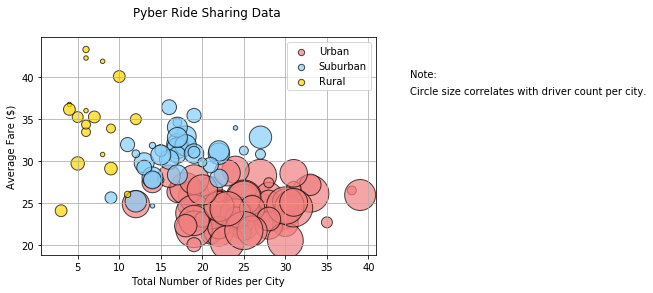

<Figure size 432x288 with 0 Axes>

In [130]:
#list of colors to pass into the for loop and variable to increment as iterating
colors=['lightcoral','lightskyblue','gold']
i=0

#Use subplots and axes to put three scatterplots on one frame
#Use for loop to iterate through each level one (type) index and add it to the scatterplot
#used the reversed function so as to plot the urban type first which seemed to impact the color display (friendlier look)
fig, ax1 = plt.subplots()
for name, group in reversed(tuple(summary_df.groupby('type'))):
    ax1.scatter(group["Total Rides"], group["Average Fare"], s=group["Total Drivers"]*20,
                color=colors[i], edgecolors='black', marker='o', alpha=0.7, label=name)
    i += 1

#add a legend and manipulate the size of the data marks, as they come back with varying sizes from above loop
lgnd=ax1.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

#add grid, title, x and y axis labels and a note to the scatterplot
ax1.grid()
ax1.set_title("Pyber Ride Sharing Data \n")
ax1.set_xlabel("Total Number of Rides per City")
ax1.set_ylabel("Average Fare ($)")
ax1.text(45, 40, 'Note:')
ax1.text(45, 38, 'Circle size correlates with driver count per city.')

plt.show()
plt.savefig("../Images/scatter_pyber_ride_sharing.png")

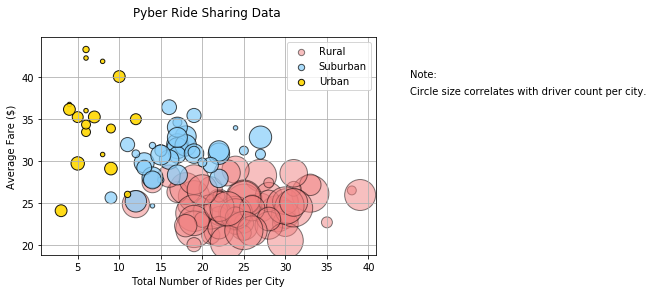

<Figure size 432x288 with 0 Axes>

In [131]:
#sub dataframes based on area type, currently not used
types=summary_df.index.unique(level='type')
x=summary_df.loc['Urban']
y=summary_df.loc['Suburban']
z=summary_df.loc['Rural']

#Build scatterplots
plt.scatter(x["Total Rides"], x["Average Fare"], s=x["Total Drivers"]*20, alpha=.5, color='lightcoral', edgecolors='black', marker='o', label='Urban')
plt.scatter(y["Total Rides"], y["Average Fare"], s=y["Total Drivers"]*20, alpha=.7, color='lightskyblue', edgecolors='black', marker='o', label='Suburban')
plt.scatter(z["Total Rides"], z["Average Fare"], s=z["Total Drivers"]*20, alpha=.9, color='gold', edgecolors='black', marker='o', label='Rural')

#Create legend and size the handles accurately
lgnd=plt.legend(types, loc="best")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

#add grid, title, x and y axis labels and a note to the scatterplot
plt.grid()
plt.title("Pyber Ride Sharing Data \n")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.text(45, 40, 'Note:')
plt.text(45, 38, 'Circle size correlates with driver count per city.')
plt.show()

#save figure
plt.savefig("../Images/scatter_pyber_ride_sharing2.png")


## Total Fares by City Type

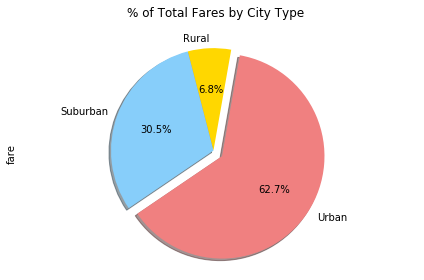

In [143]:
# Calculate Type Percents
group_by_type=pyber_df.groupby('type')
sum_up_fares=group_by_type['fare'].sum()

#define pie chart arguments
labels=summary_df.index.unique(level='type')
#sizes=sum_up_fares.values(level='type')
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
sum_up_fares.plot(kind="pie",colors=colors, explode=explode, autopct="%1.1f%%", 
                  shadow=True, startangle=80, title="% of Total Fares by City Type \n")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.tight_layout()
# Save Figure
plt.savefig("../Images/tot_fares_by_city_type.png")


## Total Rides by City Type

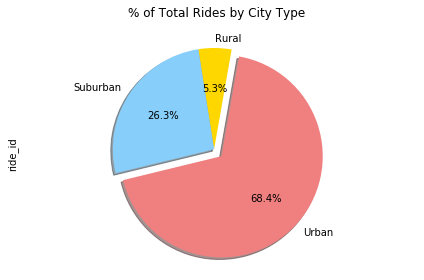

In [94]:
# Calculate Ride Percents
sum_up_rides=group_by_type['ride_id'].count()

#define pie chart arguments
labels=summary_df.index.unique(level='type')
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
sum_up_rides.plot(kind="pie",colors=colors, explode=explode, autopct="%1.1f%%", 
                  shadow=True, startangle=80, title="% of Total Rides by City Type \n")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.tight_layout()
# Save Figure
plt.savefig("../Images/tot_rides_by_city_type.png")



## Total Drivers by City Type

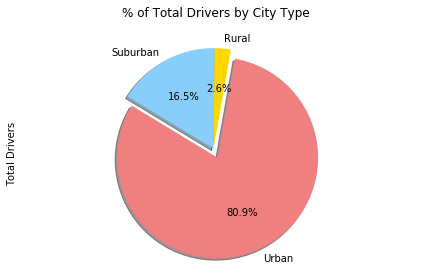

In [92]:
# Calculate Driver Percents
sum_up_drivers=summary_df.groupby('type')['Total Drivers'].sum()

#define pie chart arguments
labels=summary_df.index.unique(level='type')
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
sum_up_drivers.plot(kind="pie",colors=colors, explode=explode, autopct="%1.1f%%", 
                    shadow=True, startangle=80, title="% of Total Drivers by City Type \n")

# Save Figure
plt.axis("equal")
plt.tight_layout()
plt.savefig("../Images/tot_drivers_by_city_type.png")


In [96]:
plt.show()